In [90]:
from __future__ import division

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical # this is for changing label to categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras as kr

In [8]:
df = pd.read_csv('./train.csv')

In [11]:
# Load data

data = df.values.astype(np.float32)
np.random.shuffle(data)
X = data[:, 1:]
Y = data[:, 0]

Xtrain = X[:-1000]
Ytrain = Y[:-1000]
Xtest  = X[-1000:]
Ytest  = Y[-1000:]

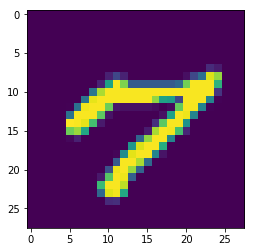

In [12]:
s = np.reshape(Xtrain[0], (28, 28))
plt.imshow(s)
plt.show()

In [13]:
# normalizie the data

mu = Xtrain.mean(axis=0)
std = Xtrain.std(axis=0)

np.place(std, std == 0, 1)

Xtrain = (Xtrain - mu) / std
Xtest = (Xtest - mu) / std

In [17]:
Ytrain_ind = to_categorical(Ytrain, num_classes=10)
Ytest_ind = to_categorical(Ytest, num_classes=10)

In [20]:
# data is ready

Xtrain = Xtrain.astype(np.float32)
Xtest = Xtest.astype(np.float32)
Ytrain = Ytrain.astype(np.float32)
Ytest = Ytest.astype(np.float32)
Ytrain_ind = Ytrain_ind.astype(np.float32)
Ytest_ind = Ytest_ind.astype(np.float32)

Neural Network

In [107]:
N, D = Xtrain.shape
M1 = 500
M2 = 300
K = 10

In [108]:
model = Sequential()

In [109]:
#ANN [784] -> [300] -> [100] -> [10]


#model.add(Dense(units = M1, input_dim = D, kernel_regularizer=kr.regularizers.l2(0.01), activity_regularizer=kr.regularizers.l1(0.01)))
#keras.regularizers.l1(0.)
#keras.regularizers.l2(0.)
#keras.regularizers.l1_l2(l1=0.01, l2=0.01)

model.add(Dense(units = M1, input_dim = D))
model.add(BatchNormalization()) #Batch Normalization.  You can just add one line!!
model.add(Activation('relu'))
#model.add(Dropout(0.2)) #rate: float between 0 and 1. Fraction of the input units to drop.
model.add(Dense(units = M2)) #no input_dim required
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(units = K))
model.add(Activation('softmax'))

In [110]:
#List of losses: https://keras.io/losses/
#List of optimizer: https://keras.io/optimizers/
#List of metrics: https://keras.io/metrics/

#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#----------------------------------------------------------------
#optimizer = kr.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)  SGD equips with momentum. 
#optimizer = kr.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#optimizer = kr.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#optimizer = kr.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#optimizer = kr.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = kr.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#optimizer = kr.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#-----------------------------------------------------------------

optimizer = kr.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

model.compile(loss = 'categorical_crossentropy', 
            optimizer = optimizer, metrics= ['accuracy'])

In [111]:
r = model.fit(Xtrain, Ytrain_ind, batch_size = 500, validation_split = 0.1, epochs = 15)
#print(r)
print(r.history.keys())
#dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

Train on 36900 samples, validate on 4100 samples
Epoch 1/15
36900/36900 [==============================] - 4s 108us/step - loss: 0.3487 - acc: 0.8976 - val_loss: 0.2415 - val_acc: 0.9288
Epoch 2/15
36900/36900 [==============================] - 4s 103us/step - loss: 0.1149 - acc: 0.9676 - val_loss: 0.1617 - val_acc: 0.9551
Epoch 3/15
36900/36900 [==============================] - 4s 106us/step - loss: 0.0704 - acc: 0.9812 - val_loss: 0.1425 - val_acc: 0.9585
Epoch 4/15
36900/36900 [==============================] - 4s 103us/step - loss: 0.0436 - acc: 0.9898 - val_loss: 0.1344 - val_acc: 0.9622
Epoch 5/15
36900/36900 [==============================] - 4s 108us/step - loss: 0.0280 - acc: 0.9948 - val_loss: 0.1235 - val_acc: 0.9668
Epoch 6/15
36900/36900 [==============================] - 4s 103us/step - loss: 0.0168 - acc: 0.9974 - val_loss: 0.1124 - val_acc: 0.9702 1s - loss
Epoch 7/15
36900/36900 [==============================] - 4s 106us/step - loss: 0.0130 - acc: 0.9983 - val_loss: 

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_10 (Batc (None, 500)               2000      
_________________________________________________________________
activation_19 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_11 (Batc (None, 300)               1200      
_________________________________________________________________
activation_20 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                3010      
__________

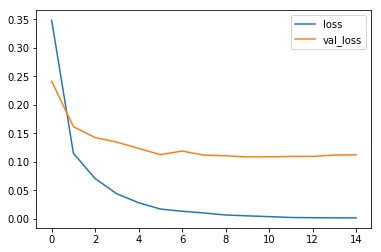

In [113]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()
plt.show()

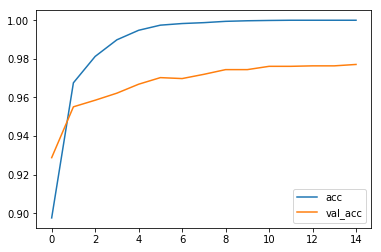

In [114]:
plt.plot(r.history['acc'], label = 'acc')
plt.plot(r.history['val_acc'], label= 'val_acc')
plt.legend()
plt.show()

In [115]:
model.evaluate(Xtest, Ytest_ind)

1000/1000 [==============================] - 0s 63us/step


[0.1207769948411733, 0.97]

In [116]:
pred = np.argmax(model.predict(Xtest), axis = 1)
c = 0

for i in range(len(Ytest_ind)):
    if Ytest[i] == pred[i]:
        c += 1
    
print(c/len(Ytest))

0.97
